/kaggle/input/auto-mpg-dataset/auto-mpg.csv

These features provide information about various aspects of the cars, including their engine specifications, weight, acceleration, manufacturing year, origin, and name. During data analysis and modeling, I will explore how these features relate to the target variable (mpg) and their predictive power in estimating fuel efficiency.

#### mpg (Miles Per Gallon):
the target variable and represents the fuel efficiency of the car in miles per gallon (mpg).
(continuous numerical variable)

 #### cylinders:
the number of cylinders in the car's engine.It can indicate the engine's size and performance.
(discrete numerical variable)

####  displacement:
The engine's displacement, measured in cubic inches (cu in). It represents the size of the engine, which can affect fuel efficiency and performance.
(continuous numerical variable)

#### horsepower:
The car's horsepower rating. Horsepower is a measure of engine power and can influence a car's performance.
(continuous numerical variable)

#### weight:
The weight of the car in pounds (lbs). Heavier cars tend to have lower fuel efficiency.
(continuous numerical variable)

#### acceleration:
The time it takes for the car to accelerate from 0 to 60 miles per hour (mph) in seconds.
(continuous numerical variable)

#### model year:
The year in which the car model was manufactured.
(discrete numerical variable)

#### origin:
The origin or manufacturing region of the car.
(categorical variable)
Common values include 1 for American cars, 2 for European cars, and 3 for Asian cars.

#### car name:
The name or identifier of the car model.
(categorical variable)
Car names may not be directly used in modeling but can be useful for identification.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, skew

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy.stats import boxcox

In [5]:
data=pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
data.shape

(398, 9)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [13]:
#check of missing values
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
data["horsepower"][data["horsepower"]=="?"]


Series([], Name: horsepower, dtype: float64)

In [15]:
# Replace ? values with NaN
data["horsepower"]=data["horsepower"].replace("?",np.NaN)
data["horsepower"].isnull().sum()

6

In [16]:
# Convertion of horsepower - object to float
data["horsepower"]=data["horsepower"].astype(float)

In [17]:
# Impute NaN values with mean
data["horsepower"]=data["horsepower"].fillna(data["horsepower"].mean())

In [18]:
# check:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
selected_columns = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

correlation_matrix = selected_columns.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   

              acceleration  model year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.684259   -0.411651  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model year        0.288137    1.000000  


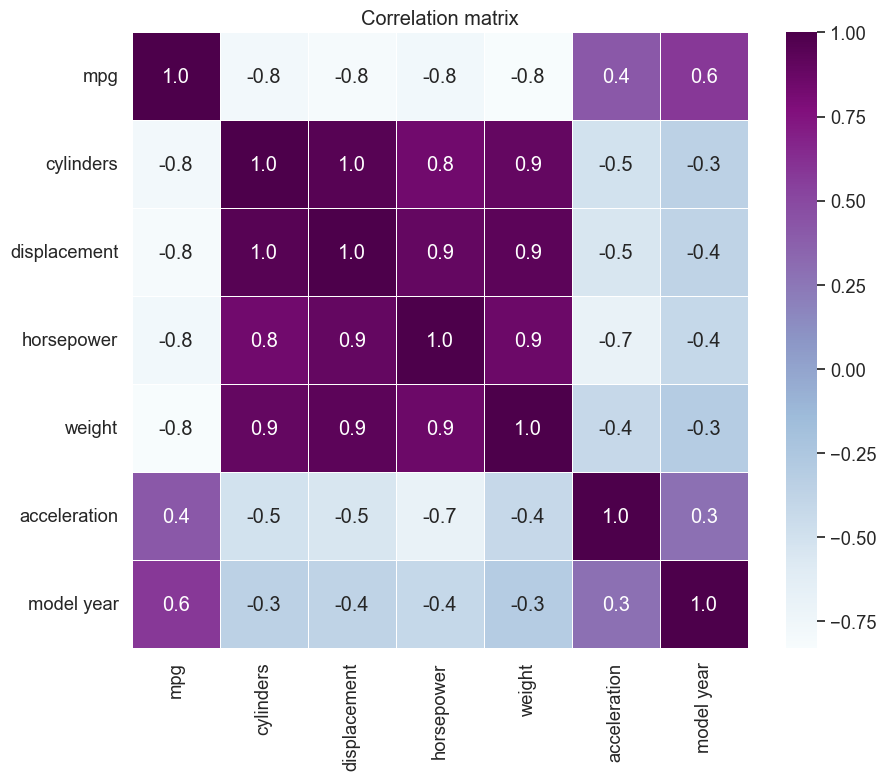

In [20]:
selected_columns = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, linewidths=0.5, fmt=".1f", cmap="BuPu", square=True, annot=True)

plt.title('Correlation matrix')


plt.show()

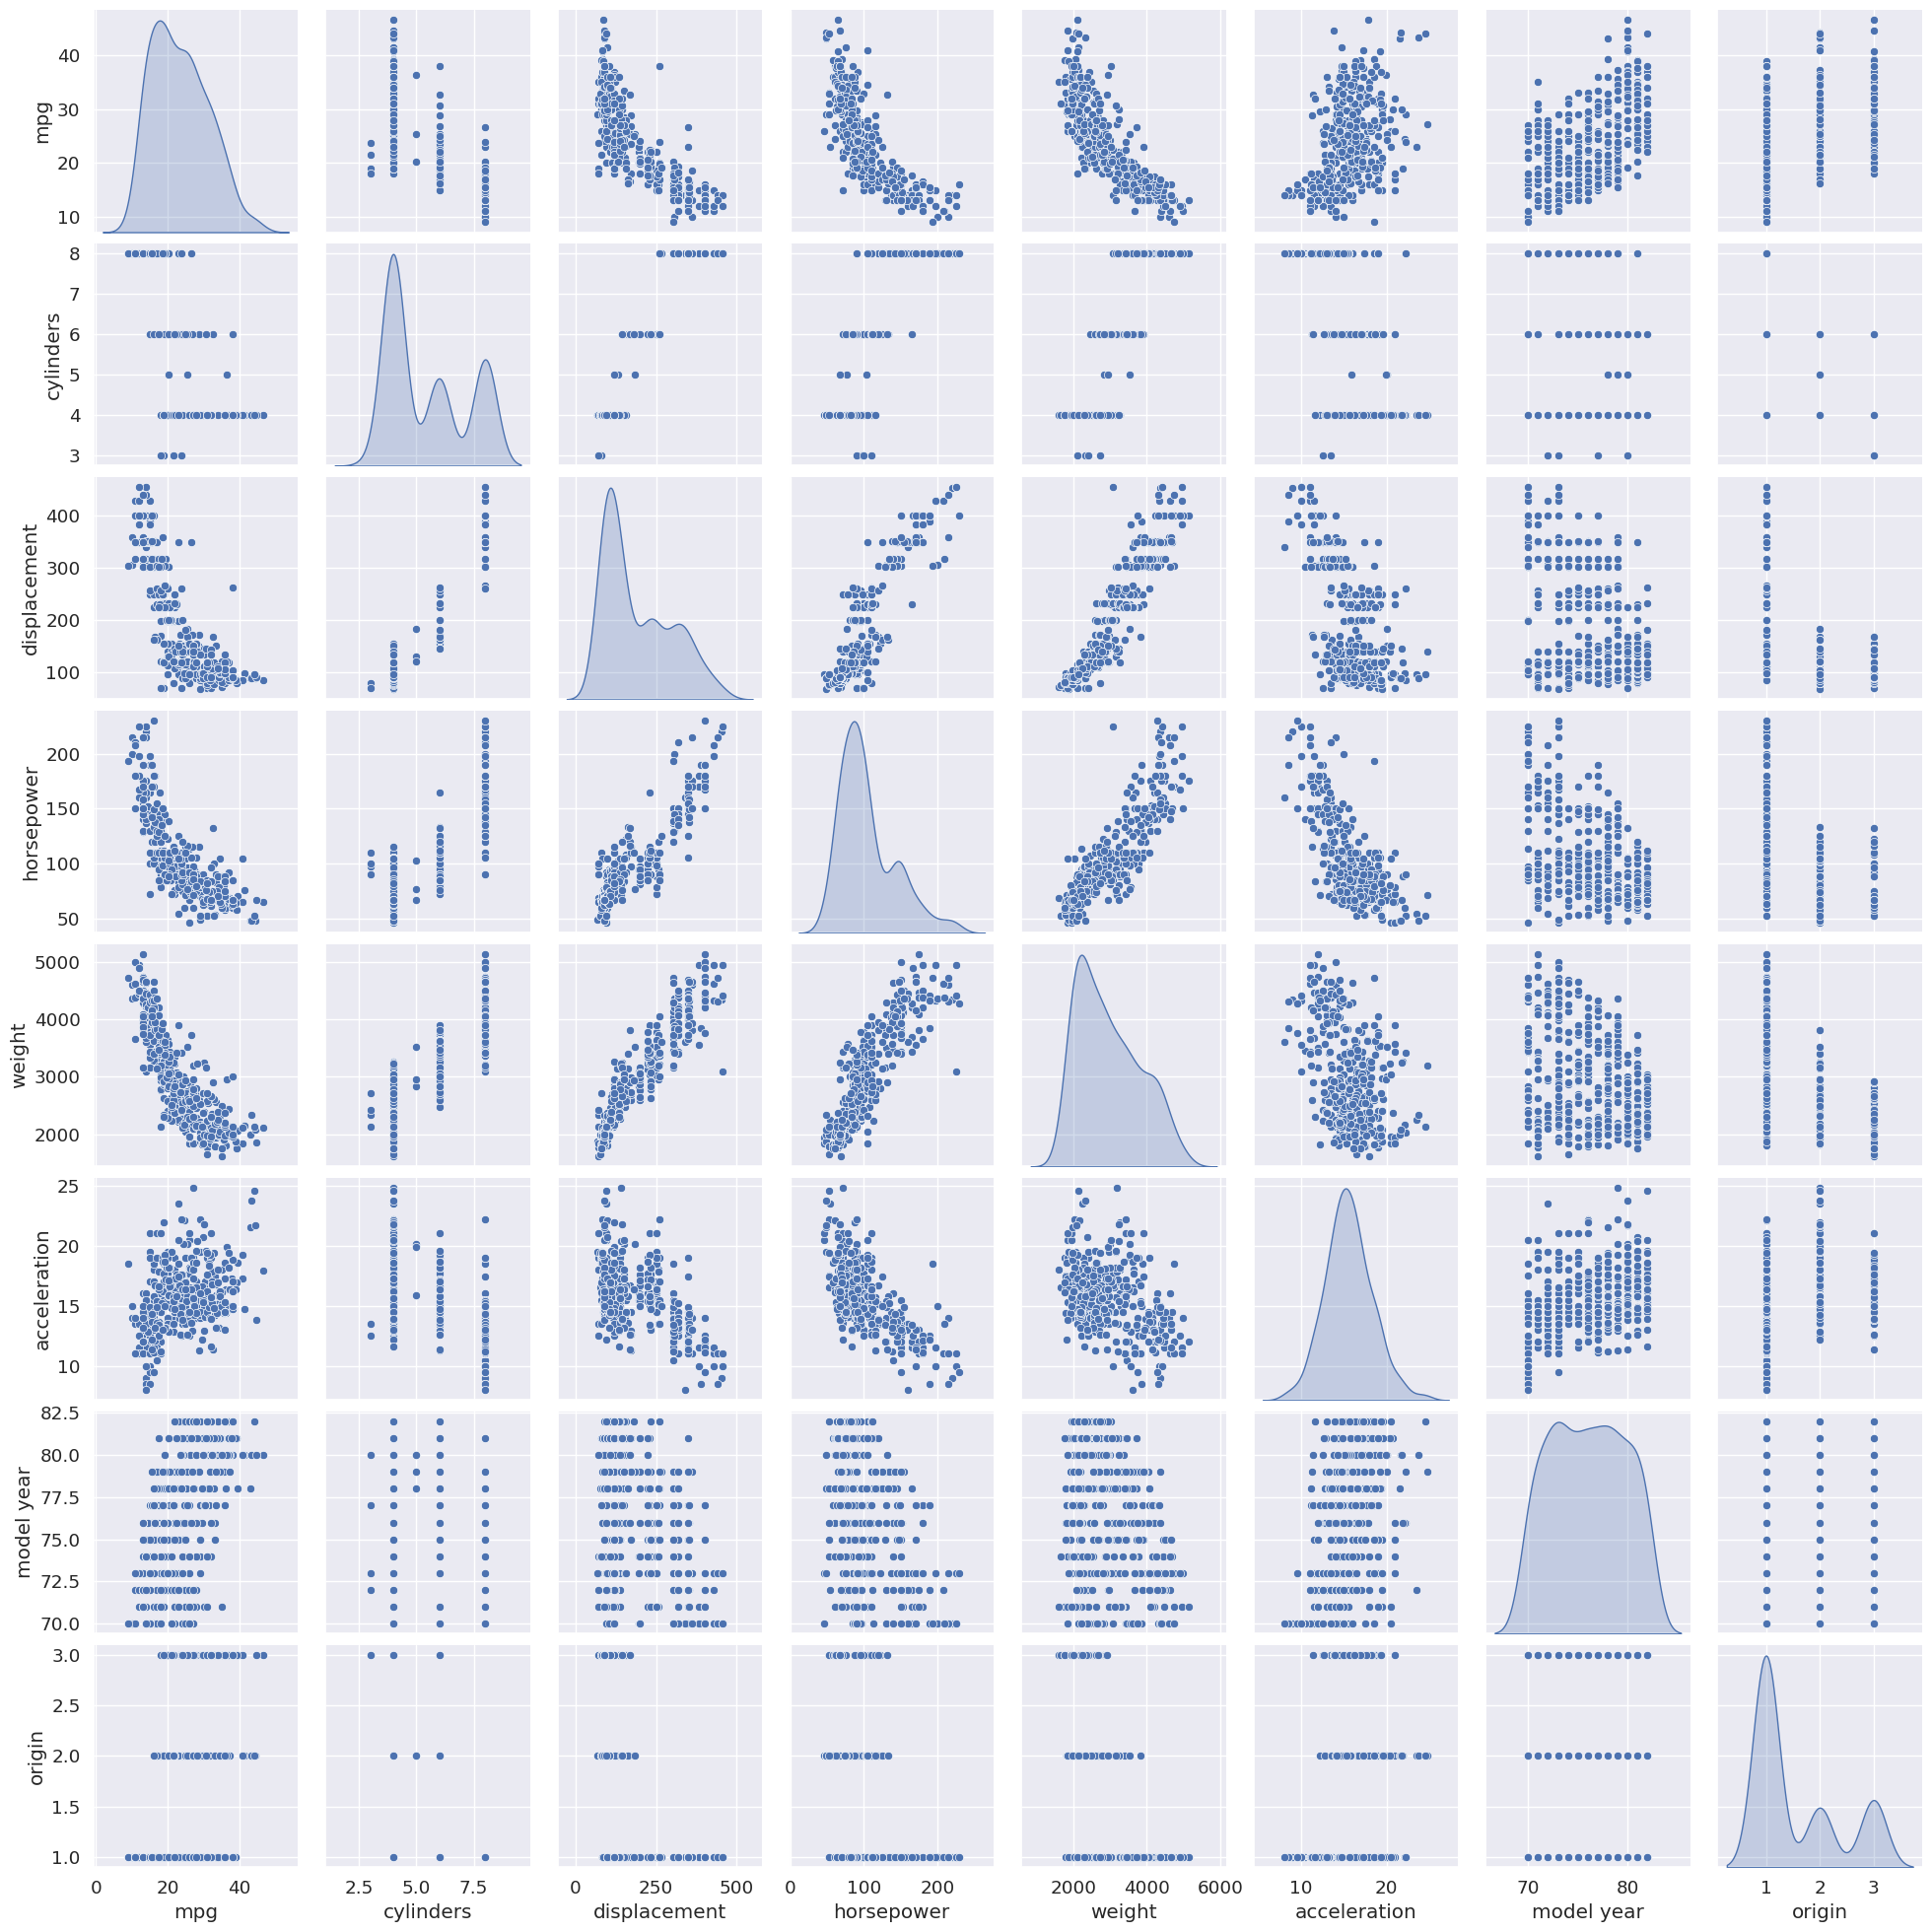

In [15]:
sns.pairplot(data,diag_kind='kde')

## Data analysis


In [21]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


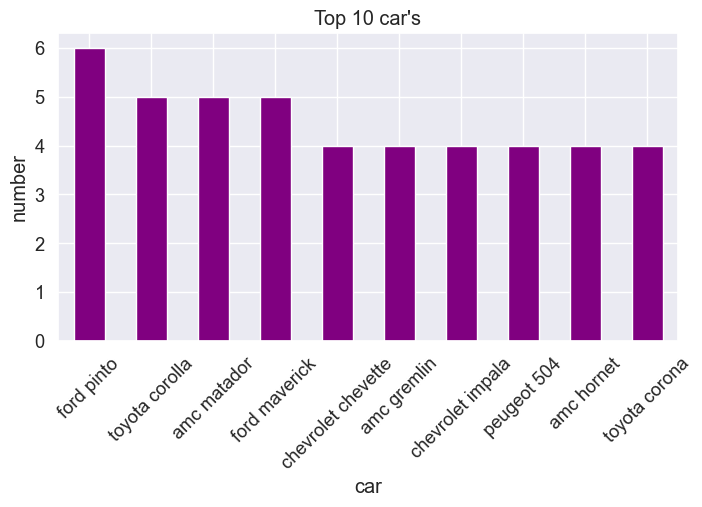

In [24]:
# Top 10 of cars

top_10_cars = data['car name'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_10_cars.plot(kind='bar', color='purple')
plt.title("Top 10 car's")
plt.xlabel('car')
plt.ylabel('number')
plt.xticks(rotation=45)
plt.show()

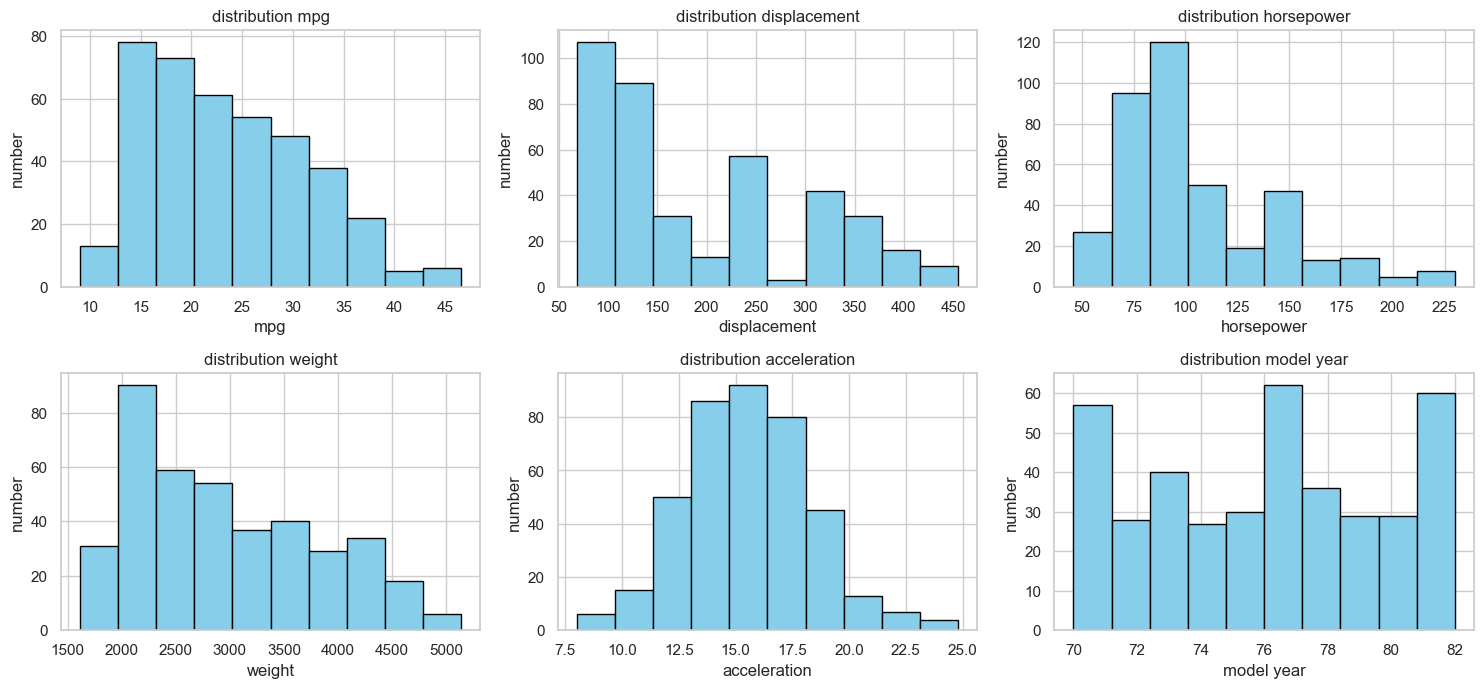

In [25]:
# choosing columns
columns_to_plot = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'distribution {column}')
    plt.xlabel(column)
    plt.ylabel('number')

plt.tight_layout()
plt.show()

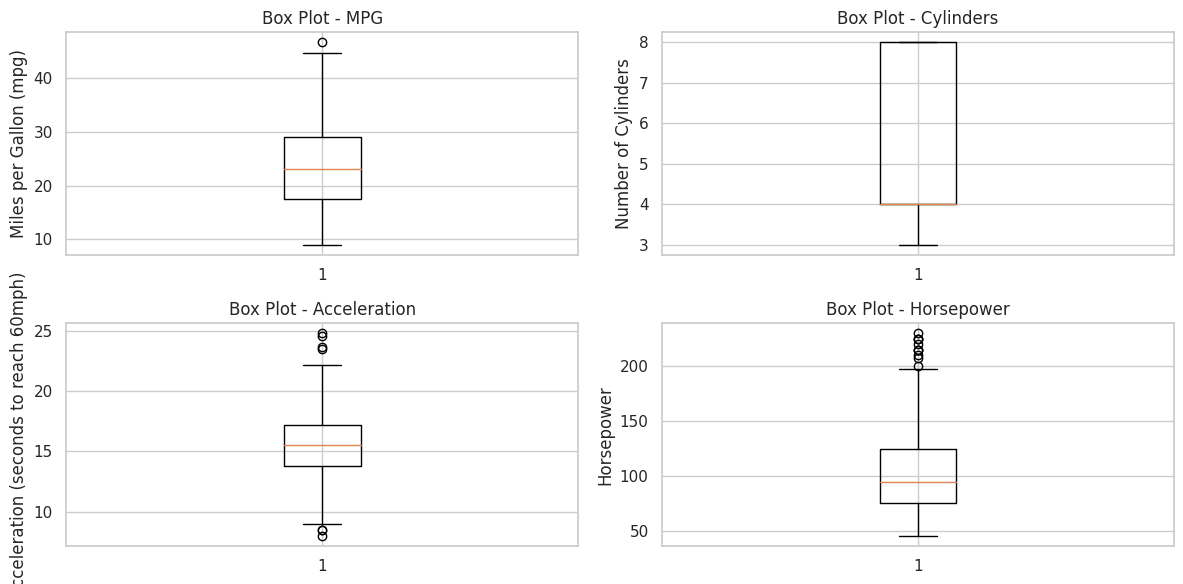

Descriptive Statistics for MPG:
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Descriptive Statistics for Cylinders:
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

Descriptive Statistics for Acceleration:
count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

Descriptive Statistics for Horsepower:
count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64


In [21]:
# Creating subplots
plt.figure(figsize=(12, 6))

# Subplot 1 - Box Plot for 'mpg' (miles per gallon)
plt.subplot(2, 2, 1)
plt.boxplot(data['mpg'])  # Creating a box plot
plt.title('Box Plot - MPG')  # Title of the plot
plt.ylabel('Miles per Gallon (mpg)')  # Y-axis label

# Subplot 2 - Box Plot for 'cylinders'
plt.subplot(2, 2, 2)
plt.boxplot(data['cylinders'])
plt.title('Box Plot - Cylinders')
plt.ylabel('Number of Cylinders')  # Y-axis label

# Subplot 3 - Box Plot for 'acceleration'
plt.subplot(2, 2, 3)
plt.boxplot(data['acceleration'])
plt.title('Box Plot - Acceleration')
plt.ylabel('Acceleration (seconds to reach 60mph)')  # Y-axis label

# Subplot 4 - Box Plot for 'horsepower'
plt.subplot(2, 2, 4)
plt.boxplot(data['horsepower'])
plt.title('Box Plot - Horsepower')
plt.ylabel('Horsepower')  # Y-axis label

# Adjusting subplots for a clean layout
plt.tight_layout()

# Displaying the plots
plt.show()

# Descriptive statistics for 'mpg'
mpg_stats = data['mpg'].describe()
print("Descriptive Statistics for MPG:")
print(mpg_stats)

# Descriptive statistics for 'cylinders'
cylinders_stats = data['cylinders'].describe()
print("\nDescriptive Statistics for Cylinders:")
print(cylinders_stats)

# Descriptive statistics for 'acceleration'
acceleration_stats = data['acceleration'].describe()
print("\nDescriptive Statistics for Acceleration:")
print(acceleration_stats)

# Descriptive statistics for 'horsepower'
horsepower_stats = data['horsepower'].describe()
print("\nDescriptive Statistics for Horsepower:")
print(horsepower_stats)

#### MPG (Miles per Gallon):

The MPG (Miles per Gallon) attribute provides insights into the fuel efficiency of the vehicles in the dataset. On average, the vehicles in the dataset achieve approximately 23.51 miles per gallon, with a standard deviation of 7.82. The minimum recorded MPG is 9.00, indicating the least fuel-efficient vehicle, while the maximum MPG is an impressive 46.60. In the data is the 25th percentile is at 17.50 MPG, the median (50th percentile) is at 23.00 MPG, and the 75th percentile is at 29.00 MPG. These statistics offer a valuable glimpse into the range and distribution of fuel efficiency across the vehicles in the dataset.

#### Cylinders:

The "Cylinders" attribute represents the number of cylinders in a vehicle's engine. In this dataset, the average number of cylinders is approximately 5.45, with a standard deviation of 1.70. The minimum number of cylinders is 3.00, indicating vehicles with smaller engines, while the maximum is 8.00, representing vehicles with larger, more powerful engines. The data is relatively symmetric, with a 25th percentile value of 4.00 and both the median (50th percentile) and 75th percentile at 4.00 as well. This suggests that a significant portion of the vehicles in the dataset has a 4-cylinder engine configuration. However, there are also vehicles with 3-cylinder and 8-cylinder engines, reflecting diversity in engine types among the vehicles.


#### Acceleration:

The "Acceleration" attribute represents how quickly a vehicle can increase its speed. The dataset's average acceleration is approximately 15.57 units, with a standard deviation of 2.76. The fastest recorded acceleration is 24.80 units, while the slowest is 8.00 units. The data is relatively symmetric, with a 25th percentile value of 13.83, a median (50th percentile) of 15.50, and a 75th percentile of 17.18. These statistics give us insights into the variability and distribution of acceleration performance among the vehicles in the dataset. Vehicles with higher acceleration values tend to reach their desired speeds more rapidly.


#### Horsepower:

The "Horsepower" attribute quantifies the engine power of the vehicles in the dataset. On average, the vehicles have a horsepower of approximately 104.47, with a standard deviation of 38.20. The lowest recorded horsepower is 46.00, representing less powerful engines, while the highest is 230.00, signifying very powerful engines. In the data a 25th percentile value of 76.00, a median (50th percentile) of 95.00, and a 75th percentile of 125.00. These statistics provide valuable insights into the distribution of engine power among the vehicles, with some having considerably higher horsepower than others. Higher horsepower generally indicates greater engine strength and potential for higher performance.


### Outliers

During the analysis, I employed the 3-sigma method to identify and exclude outlier observations.

In [26]:
mean_acceleration = data['acceleration'].mean()
std_acceleration = data['acceleration'].std()

lower_bound = mean_acceleration - 3 * std_acceleration
upper_bound = mean_acceleration + 3 * std_acceleration

filtered_data = data[(data['acceleration'] >= lower_bound) & (data['acceleration'] <= upper_bound)]
print("acceleration mean: ",mean_acceleration)
print("acceleration std: ",std_acceleration)



acceleration mean:  15.568090452261307
acceleration std:  2.7576889298126757


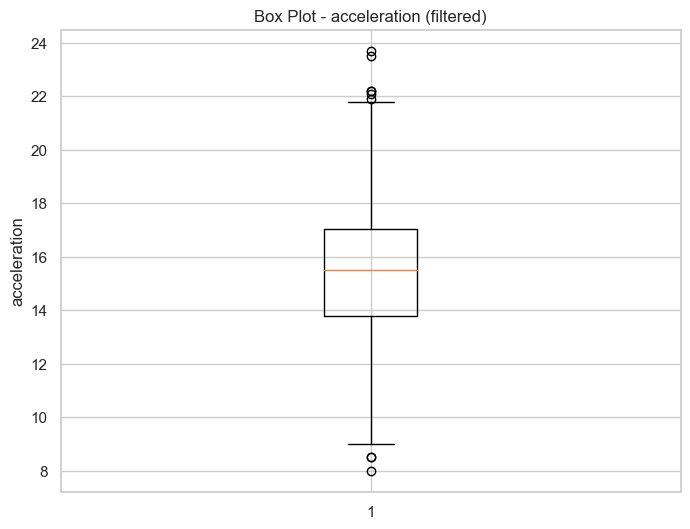

In [27]:
#creating a boxplot for the filtered acceleration values
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['acceleration'])
plt.title('Box Plot - acceleration (filtered)')
plt.ylabel('acceleration')
plt.show()

## Feature engineering


<ipython-input-24-efdb97a8ccb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.mpg,fit=norm)


<Axes: xlabel='mpg', ylabel='Density'>

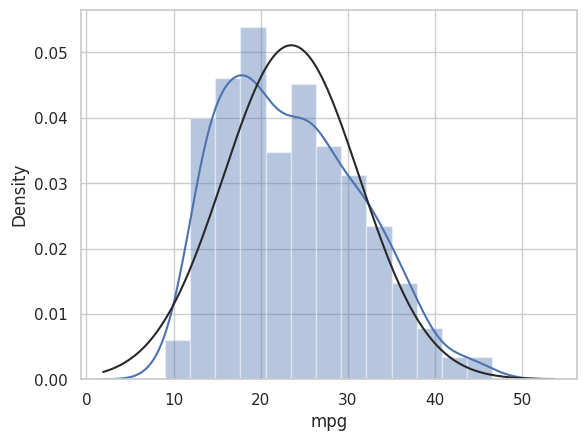

In [24]:
sns.distplot(data.mpg,fit=norm)

In [28]:
(mean,standard_deviation)=norm.fit(data["mpg"])
print("Mean: {}, Standard Deviation: {}".format(mean,standard_deviation))

Mean: 23.514572864321607, Standard Deviation: 7.806159061274433


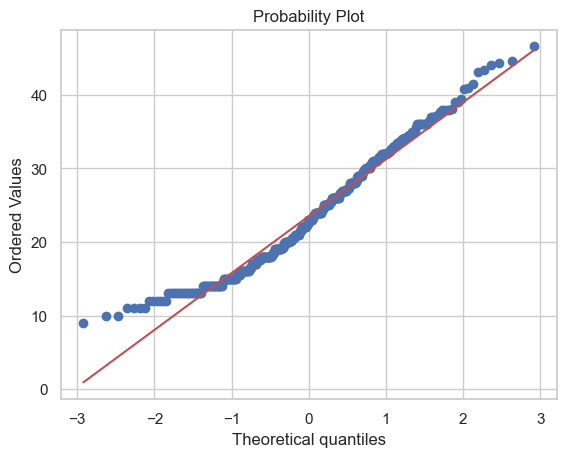

In [29]:
from scipy import stats

# QQ PLOT:
stats.probplot(data["mpg"],plot=plt)
plt.show()

Mean: 3.1478302770344047, Standard Deviation: 0.32375928015327066


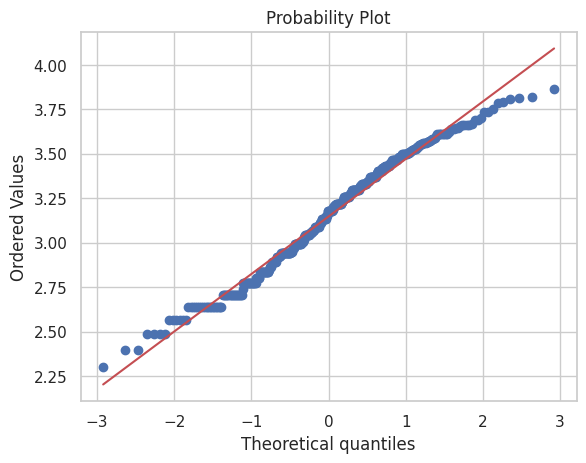

In [27]:
#logarithmizing data
data_log = pd.DataFrame()
data_log["mpg"]=np.log1p(data["mpg"])


(mean,standard_deviation)=norm.fit(data_log["mpg"])
print("Mean: {}, Standard Deviation: {}".format(mean,standard_deviation))
stats.probplot(data_log["mpg"],plot=plt)
plt.show()

In [28]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Model preparation

In the model preparation phase, my focus is on a statistical approach rather than machine learning. Hence, there is no data split into training and testing sets.

In [30]:
## Forward Feature Selection

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [31]:
# Scaling data
cols_to_use = ['cylinders', 'displacement', 'horsepower', 'acceleration']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[cols_to_use])

In [32]:
scaled_data

array([[ 1.49819126,  1.0906037 ,  0.66919608, -1.29549834],
       [ 1.49819126,  1.5035143 ,  1.58659918, -1.47703779],
       [ 1.49819126,  1.19623199,  1.19342642, -1.65857724],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, -1.4407299 ],
       [-0.85632057, -0.70507731, -0.66759129,  1.10082237],
       [-0.85632057, -0.71467988, -0.58895674,  1.39128549]])

In [33]:
final_data = scaled_data.copy()
final_data = pd.DataFrame(scaled_data.T, cols_to_use ).T

In [34]:
final_data["mpg"] = data['mpg'].copy()

In [35]:
final_data.head()

,cylinders,displacement,horsepower,acceleration,mpg
0,1.498191,1.090604,0.669196,-1.295498,18.0
1,1.498191,1.503514,1.586599,-1.477038,15.0
2,1.498191,1.196232,1.193426,-1.658577,18.0
3,1.498191,1.061796,1.193426,-1.295498,16.0
4,1.498191,1.042591,0.931311,-1.840117,17.0


In [36]:
model = LinearRegression()


In [37]:
y_name = "mpg"

In [38]:
all_possible = final_data.columns

In [39]:
all_possible

Index(['cylinders', 'displacement', 'horsepower', 'acceleration', 'mpg'], dtype='object')

In [40]:
scores = []
for name in all_possible:
  model.fit(final_data[[name]], final_data[y_name])
  score = model.score(final_data[[name]], final_data[y_name])
  scores.append((name, score))

In [41]:
scores

[('cylinders', 0.6012393994439937),
 ('displacement', 0.646742183425786),
 ('horsepower', 0.5951152532609462),
 ('acceleration', 0.17664276963558934),
 ('mpg', 1.0)]

In [42]:
scores_val = [item[1] for item in scores]
best = np.argmax(scores_val)

In [43]:
scores[best][1]

1.0

In [44]:
tolerance = 0.01

In [45]:
print(current_names)
print(all_possible )

NameError: name 'current_names' is not defined

In [46]:
attr_names = list(final_data.drop(['mpg'], axis=1).columns)
current_names = []
last_score = 0
cur_diff = 1
while current_names != list(all_possible) and cur_diff > tolerance:
  scores = []
  for name in attr_names:
    model.fit(final_data[current_names + [name]], final_data[y_name])
    score = model.score(final_data[current_names + [name]], final_data[y_name])
    scores.append((name, score))

  scores_val = [item[1] for item in scores]
  best = np.argmax(scores_val)
  chosen_col = scores[best][0]
  current_names.append(chosen_col)
  cur_diff = scores[best][1] - last_score
  attr_names.remove(chosen_col)
  last_score = scores[best][1]

  print(scores, scores[best], current_names, sep='\n')

[('cylinders', 0.6012393994439937), ('displacement', 0.646742183425786), ('horsepower', 0.5951152532609462), ('acceleration', 0.17664276963558934)]
('displacement', 0.646742183425786)
['displacement']
[('cylinders', 0.6479608316715759), ('horsepower', 0.6605660259605466), ('acceleration', 0.6471497280984546)]
('horsepower', 0.6605660259605466)
['displacement', 'horsepower']
[('cylinders', 0.6625068203278177), ('acceleration', 0.6698992157104883)]
('acceleration', 0.6698992157104883)
['displacement', 'horsepower', 'acceleration']


Forward feature selection can be done automatically using the scikit-learn library, but for the purpose of practice, I performed it manually. 
The final model should include three variables: 'displacement,' 'horsepower,' and 'acceleration,' as this combination is expected to be the most optimal.

#### Backward Feature Selection

In [47]:
final_data.head()

,cylinders,displacement,horsepower,acceleration,mpg
0,1.498191,1.090604,0.669196,-1.295498,18.0
1,1.498191,1.503514,1.586599,-1.477038,15.0
2,1.498191,1.196232,1.193426,-1.658577,18.0
3,1.498191,1.061796,1.193426,-1.295498,16.0
4,1.498191,1.042591,0.931311,-1.840117,17.0


In [48]:
all_possible

Index(['cylinders', 'displacement', 'horsepower', 'acceleration', 'mpg'], dtype='object')

In [49]:
# Create a linear regression model
model = LinearRegression()

In [50]:
y_name = "mpg"
all_possible = final_data.drop(y_name, axis=1).columns.tolist()

In [51]:
current_names = all_possible.copy()

In [52]:
tolerance = 0.01

In [53]:
model.fit(final_data[current_names], final_data[y_name])

LinearRegression()

In [54]:
# the initial R-squared score
best_score = model.score(final_data[current_names], final_data[y_name])

In [55]:
best_score

0.6718030857932036

In [61]:
# Backward selection loop
while len(current_names) > 0:
    scores = []

    for name in current_names:
        # copy of the current variables and removing the variable 'name'
        selected_names = current_names.copy()
        selected_names.remove(name)
       

        # Fitting the model without the variable 'mpg'
        model.fit(final_data[selected_names], final_data[y_name])

        # Calculation of the score
        score = model.score(final_data[selected_names], final_data[y_name])
        print(score, selected_names)
        scores.append((name, score))

    # Sorting the scores from worst to best
    scores.sort(key=lambda x: x[1], reverse=True)

    # Selecting the variable with the worst score
    worst_variable = scores[0][0]
    print (f"Worst var: {worst_variable}")
    print(f'Difference: {best_score - scores[0][1]}')

    # Checking if the improvement is smaller than the tolerance
    if best_score - scores[0][1] >= tolerance:
        break
    
        
           
    # Updating the current variables by removing the worst variable
    current_names.remove(worst_variable)

    # Updating the best score
    best_score = scores[0][1]
    
    
print("Best independent variables:", current_names)
print("Best score:", best_score)



0.6698992157104883 ['displacement', 'horsepower', 'acceleration']
0.6623647306086331 ['cylinders', 'horsepower', 'acceleration']
0.6483092812167384 ['cylinders', 'displacement', 'acceleration']
0.6625068203278178 ['cylinders', 'displacement', 'horsepower']
Worst var: cylinders
Difference: 0.0019038700827153088
0.6168760524237846 ['horsepower', 'acceleration']
0.6471497280984546 ['displacement', 'acceleration']
0.6605660259605466 ['displacement', 'horsepower']
Worst var: acceleration
Difference: 0.009333189749941684
0.5951152532609462 ['horsepower']
0.646742183425786 ['displacement']
Worst var: horsepower
Difference: 0.013823842534760544
Best independent variables: ['displacement', 'horsepower']
Best score: 0.6605660259605466


Similarly, for the backward selection loop, after applying this method, the best independent variables for the model turned out to be 'displacement' and 'horsepower.'